In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from tqdm import tqdm

#### Load dataset

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

df = pd.read_csv(url)

df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.

In [4]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.shape

(238, 14)

# Task 1: Using Cross Validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.

In [5]:
y_data = df['Price']
x_data = df.drop('Price', axis=1)

Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.

In [20]:
lr_model = LinearRegression()

lr_model.fit(x_train[['CPU_frequency']], y_train)

# R^2
print("train: ", lr_model.score(x_train[['CPU_frequency']], y_train))
print("test: ", lr_model.score(x_test[['CPU_frequency']], y_test))

train:  0.14829792099817984
test:  -0.06599437350393811


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.

In [21]:
rCross = cross_val_score(lr_model, x_data[['CPU_frequency']], y_data, cv=4)

print("Mean: ", rCross.mean(), "\nStd: ", rCross.std())

Mean:  -0.16109232388595096 
Std:  0.3849579786664708


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 119
number of training samples: 119


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.

In [30]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5] 

for n in order:
  pr = PolynomialFeatures(degree=n) 
  x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
  x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
  lre.fit(x_train_pr, y_train)
  Rsqu_test.append(lre.score(x_test_pr, y_test))
  
Rsqu_test

[0.05322174176198102,
 -0.026920818678999314,
 0.05156345792558026,
 -0.9948137915476414,
 -1.375936095697067]

Plot the values of R^2 scores against the order. Note the point where the score drops.

Text(0.5, 1.0, 'R^2 Using Test Data')

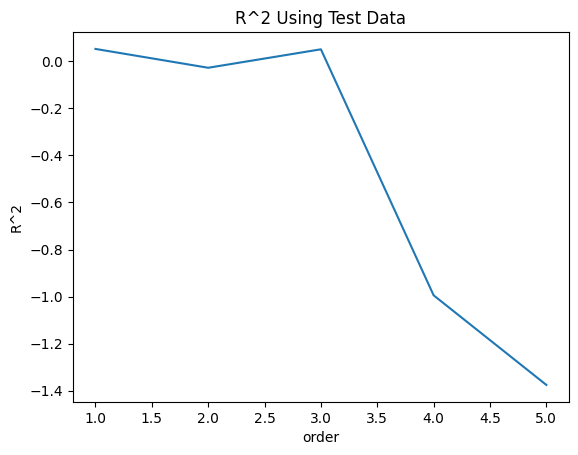

In [31]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title("R^2 Using Test Data")

# Task 3: Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [ ]:
pr = PolynomialFeatures(degree=2) 
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. Create a list of all Ridge Regression R^2 scores for training and testing data.

In [35]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
  RigeModel = Ridge(alpha=alpha)
  RigeModel.fit(x_train_pr, y_train)
  test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
  pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
  Rsqu_test.append(test_score)
  Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:08<00:00, 111.38it/s, Test Score=0.0994, Train Score=0.283]


Plot the R^2 values for training and testing sets with respect to the value of alpha

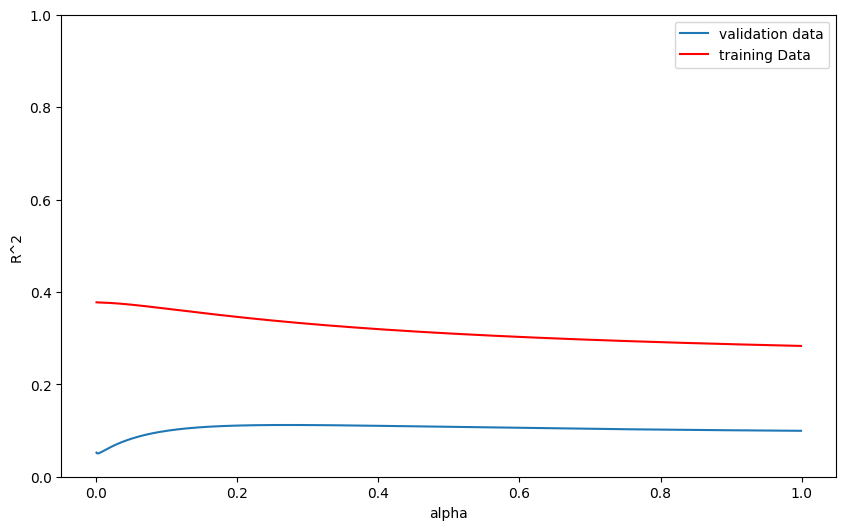

In [36]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. Assume the set of alpha values to be used as

In [37]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]


Create a Ridge instance and run Grid Search using a 4 fold cross validation.

In [38]:
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)


Fit the Grid Search to the training data

In [39]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.

In [40]:
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.3009905048691819
